# Requirements

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **average sea-level pressure** in the city of Skopje. Your task involves employing bagging and boosting methods to forecast the average sea-level pressure. To accomplish this, you will use data from the preceding three days, consisting of average, minimal, and maximal temperatures, precipitation, as well as wind direction and speed, and the current season. By applying these ensemble learning techniques, you aim to enhance the accuracy and reliability of your predictions, gaining valuable insights into the temporal dynamics of sea-level pressure based on the given meteorological variables.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Weather Dataset

## Downloading the Weather Dataset

In [3]:
!gdown 1F8hSJgpOTdoe9rhFj6DYiwmPZ5hJ-ubI # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1F8hSJgpOTdoe9rhFj6DYiwmPZ5hJ-ubI
To: /content/weather.csv
100% 63.3k/63.3k [00:00<00:00, 69.6MB/s]


## Exploring the Weather Dataset
This dataset consists of daily weather records for the city of Skopje from January 1, 2021, to August 1, 2023. Each entry includes a unique station ID, city name, date, corresponding season (e.g., summer, winter), and various meteorological parameters such as average, minimum, and maximum temperatures in Celsius, precipitation in millimeters, average wind direction in degrees, average wind speed in kilometers per hour, and average sea-level pressure in hectopascals. The dataset offers comprehensive insights into the climatic conditions, allowing for analysis and exploration of weather patterns in Skopje over the specified time period.

The dataset comprises the following columns:
- station_id - unique ID for the weather station,
- city_name - name of the city where the station is located,
- date - date of the weather record,
- season - season corresponding to the date (e.g., summer, winter),
- avg_temp_c - average temperature in Celsius,
- min_temp_c - minimum temperature in Celsius,
- max_temp_c - maximum temperature in Celsius,
- precipitation_mm - precipitation in millimeters,
- avg_wind_dir_deg - average wind direction in degrees,
- avg_wind_speed_kmh - average wind speed in kilometers per hour, and
- avg_sea_level_pres_hpa - average sea-level pressure in hectopascals.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [4]:
df=pd.read_csv('/content/weather.csv')

In [5]:
df

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,13588,Skopje,2021-01-01,Winter,5.1,0.5,13.2,0.0,330.0,5.9,1021.2
1,13588,Skopje,2021-01-02,Winter,3.0,-2.6,11.2,0.0,330.0,5.9,1021.2
2,13588,Skopje,2021-01-03,Winter,6.8,3.5,12.5,1.3,339.0,8.0,1017.8
3,13588,Skopje,2021-01-04,Winter,6.6,6.1,7.2,3.6,298.0,5.3,1011.3
4,13588,Skopje,2021-01-05,Winter,4.3,2.3,6.7,4.6,11.0,5.1,1014.5
...,...,...,...,...,...,...,...,...,...,...,...
938,13588,Skopje,2023-07-28,Summer,22.8,12.3,32.7,0.0,2.0,6.8,1014.6
939,13588,Skopje,2023-07-29,Summer,26.3,16.3,35.4,0.0,261.0,6.2,1011.7
940,13588,Skopje,2023-07-30,Summer,28.2,19.5,36.4,0.0,317.0,8.0,1009.8
941,13588,Skopje,2023-07-31,Summer,25.8,20.9,32.1,0.0,307.0,12.3,1010.9


Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.

array([[<Axes: title={'center': 'station_id'}>,
        <Axes: title={'center': 'avg_temp_c'}>,
        <Axes: title={'center': 'min_temp_c'}>],
       [<Axes: title={'center': 'max_temp_c'}>,
        <Axes: title={'center': 'precipitation_mm'}>,
        <Axes: title={'center': 'avg_wind_dir_deg'}>],
       [<Axes: title={'center': 'avg_wind_speed_kmh'}>,
        <Axes: title={'center': 'avg_sea_level_pres_hpa'}>, <Axes: >]],
      dtype=object)

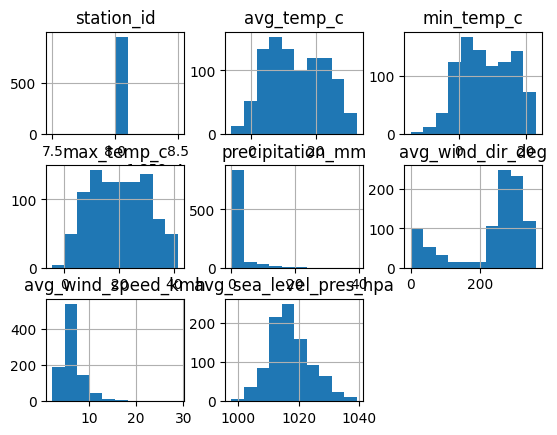

In [7]:
df.hist()

Remove the highly correlated features.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [13]:
df=df.drop(columns=['station_id'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

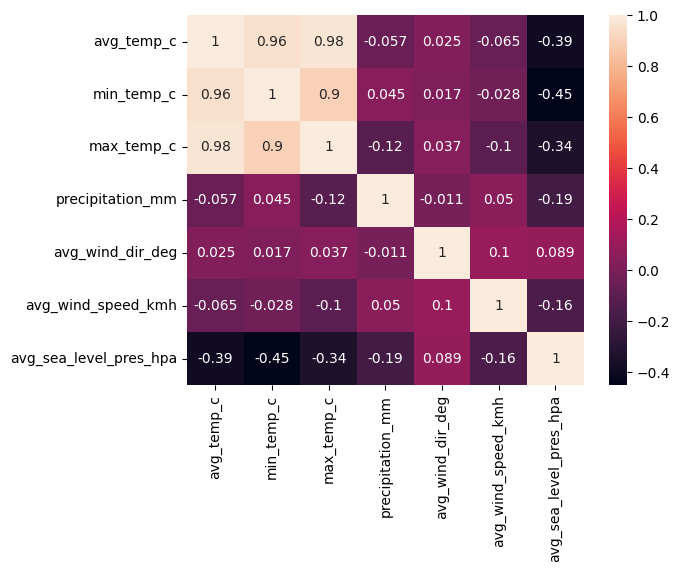

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show

Encode the categorical features.

In [15]:
df.columns

Index(['city_name', 'date', 'season', 'avg_temp_c', 'min_temp_c', 'max_temp_c',
       'precipitation_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh',
       'avg_sea_level_pres_hpa'],
      dtype='object')

In [16]:
df=df.drop(columns=['city_name'],axis=1)

In [17]:
df_copy=df.copy()

In [18]:
df=df.drop(columns=['avg_temp_c','min_temp_c','max_temp_c'],axis=1)

In [19]:
df

,date,season,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,2021-01-01,Winter,0.0,330.0,5.9,1021.2
1,2021-01-02,Winter,0.0,330.0,5.9,1021.2
2,2021-01-03,Winter,1.3,339.0,8.0,1017.8
3,2021-01-04,Winter,3.6,298.0,5.3,1011.3
4,2021-01-05,Winter,4.6,11.0,5.1,1014.5
...,...,...,...,...,...,...
938,2023-07-28,Summer,0.0,2.0,6.8,1014.6
939,2023-07-29,Summer,0.0,261.0,6.2,1011.7
940,2023-07-30,Summer,0.0,317.0,8.0,1009.8
941,2023-07-31,Summer,0.0,307.0,12.3,1010.9


<function matplotlib.pyplot.show(close=None, block=None)>

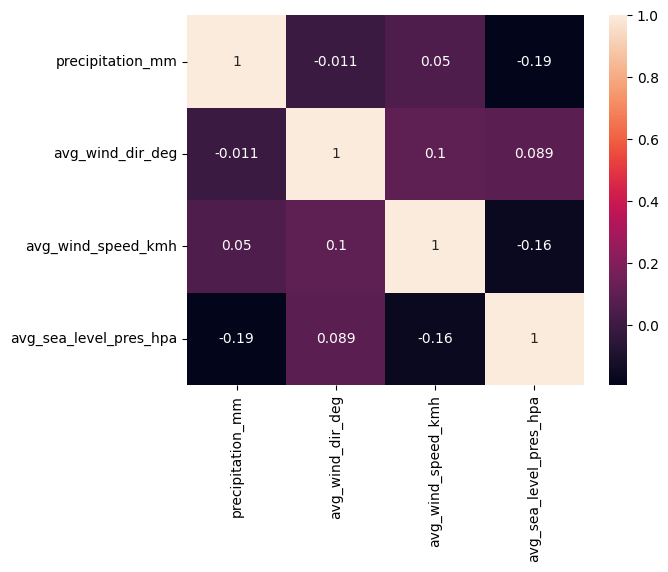

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show

In [ ]:
# Write your code here. Add as many boxes as you need.

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [22]:
df.isnull().sum()

date                      0
season                    0
precipitation_mm          0
avg_wind_dir_deg          0
avg_wind_speed_kmh        0
avg_sea_level_pres_hpa    0
dtype: int64

In [23]:
df['season']=encoder.fit_transform(df['season'])

In [24]:
df

,date,season,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,2021-01-01,3,0.0,330.0,5.9,1021.2
1,2021-01-02,3,0.0,330.0,5.9,1021.2
2,2021-01-03,3,1.3,339.0,8.0,1017.8
3,2021-01-04,3,3.6,298.0,5.3,1011.3
4,2021-01-05,3,4.6,11.0,5.1,1014.5
...,...,...,...,...,...,...
938,2023-07-28,2,0.0,2.0,6.8,1014.6
939,2023-07-29,2,0.0,261.0,6.2,1011.7
940,2023-07-30,2,0.0,317.0,8.0,1009.8
941,2023-07-31,2,0.0,307.0,12.3,1010.9


# Feauture Extraction
Select the relevant features for prediction and apply a lag of one, two, and three days to each chosen feature (except `season`), creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [25]:
df.columns

Index(['date', 'season', 'precipitation_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'avg_sea_level_pres_hpa'],
      dtype='object')

In [26]:
features=['precipitation_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'avg_sea_level_pres_hpa']

In [27]:
df

,date,season,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa
0,2021-01-01,3,0.0,330.0,5.9,1021.2
1,2021-01-02,3,0.0,330.0,5.9,1021.2
2,2021-01-03,3,1.3,339.0,8.0,1017.8
3,2021-01-04,3,3.6,298.0,5.3,1011.3
4,2021-01-05,3,4.6,11.0,5.1,1014.5
...,...,...,...,...,...,...
938,2023-07-28,2,0.0,2.0,6.8,1014.6
939,2023-07-29,2,0.0,261.0,6.2,1011.7
940,2023-07-30,2,0.0,317.0,8.0,1009.8
941,2023-07-31,2,0.0,307.0,12.3,1010.9


In [28]:
dates=['2023-08-01','2023-07-21','2023-07-30']

In [30]:
for column in features:
    df[column+'_1'] = df[column].shift(periods=1)
    df[column+'_2'] = df[column].shift(periods=2)
    df[column+'_3'] = df[column].shift(periods=3)
df


,date,season,precipitation_mm,avg_wind_dir_deg,avg_wind_speed_kmh,avg_sea_level_pres_hpa,precipitation_mm_1,precipitation_mm_2,precipitation_mm_3,avg_wind_dir_deg_1,avg_wind_dir_deg_2,avg_wind_dir_deg_3,avg_wind_speed_kmh_1,avg_wind_speed_kmh_2,avg_wind_speed_kmh_3,avg_sea_level_pres_hpa_1,avg_sea_level_pres_hpa_2,avg_sea_level_pres_hpa_3
0,2021-01-01,3,0.0,330.0,5.9,1021.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,3,0.0,330.0,5.9,1021.2,0.0,NaN,NaN,330.0,NaN,NaN,5.9,NaN,NaN,1021.2,NaN,NaN
2,2021-01-03,3,1.3,339.0,8.0,1017.8,0.0,0.0,NaN,330.0,330.0,NaN,5.9,5.9,NaN,1021.2,1021.2,NaN
3,2021-01-04,3,3.6,298.0,5.3,1011.3,1.3,0.0,0.0,339.0,330.0,330.0,8.0,5.9,5.9,1017.8,1021.2,1021.2
4,2021-01-05,3,4.6,11.0,5.1,1014.5,3.6,1.3,0.0,298.0,339.0,330.0,5.3,8.0,5.9,1011.3,1017.8,1021.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2023-07-28,2,0.0,2.0,6.8,1014.6,0.0,0.0,0.0,316.0,242.0,275.0,16.0,13.4,4.7,1012.6,1002.9,1007.7
939,2023-07-29,2,0.0,261.0,6.2,1011.7,0.0,0.0,0.0,2.0,316.0,242.0,6.8,16.0,13.4,1014.6,1012.6,1002.9
940,2023-07-30,2,0.0,317.0,8.0,1009.8,0.0,0.0,0.0,261.0,2.0,316.0,6.2,6.8,16.0,1011.7,1014.6,1012.6
941,2023-07-31,2,0.0,307.0,12.3,1010.9,0.0,0.0,0.0,317.0,261.0,2.0,8.0,6.2,6.8,1009.8,1011.7,1014.6


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
# Write your code here. Add as many boxes as you need.

In [31]:
df = df.dropna(axis=0).reset_index()

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
df.columns

Index(['index', 'date', 'season', 'precipitation_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'avg_sea_level_pres_hpa', 'precipitation_mm_1',
       'precipitation_mm_2', 'precipitation_mm_3', 'avg_wind_dir_deg_1',
       'avg_wind_dir_deg_2', 'avg_wind_dir_deg_3', 'avg_wind_speed_kmh_1',
       'avg_wind_speed_kmh_2', 'avg_wind_speed_kmh_3',
       'avg_sea_level_pres_hpa_1', 'avg_sea_level_pres_hpa_2',
       'avg_sea_level_pres_hpa_3'],
      dtype='object')

In [33]:
X,Y=df_copy.drop(columns=['date', 'season', 'avg_temp_c', 'precipitation_mm', 'avg_wind_dir_deg','avg_wind_speed_kmh', 'avg_sea_level_pres_hpa']),df_copy['avg_sea_level_pres_hpa']

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf = RandomForestRegressor(n_estimators=1500, criterion='squared_error', max_depth=10)

In [40]:
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=1500)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [41]:
y_pred = rf.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:

mean_squared_error(Y_test, y_pred)

38.98660840294536

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [44]:
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=10,alpha=0.01,n_estimators=10)
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:56:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=0.01, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [45]:
y_pred2 = model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [46]:
mean_squared_error(Y_test, y_pred2)

38.08914274502991

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the max_depth (`max_depth`) for the Random Forest model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `max_depth` and evaluating the model's performance using cross-validation. Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [60]:
# Write your code here. Add as many boxes as you need.

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,shuffle=False)

## Fine-tuning the Random Forest Hyperparameter
Experiment with various values for `max_depth` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [48]:
from sklearn.metrics import r2_score

In [57]:
bestn=0
bestestimators=0
for i in range (1,50,1):
  model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.01,max_depth=i,alpha=2,n_estimators=25)
  model.fit(X_train, Y_train)
  y_pred3 = model.predict(X_test)
  r=r2_score(Y_test,y_pred3)
  #print(r)
  if i==1:
    bestn=r
    bestestimators=i
  if (r>bestn):
    bestn=r
    bestestimators=i

print(bestn)
print(bestestimators)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:02:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:02:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:02:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:02:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

-0.7341061987244941
3


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:02:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:02:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:02:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:02:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


## Final Assessment of the Model Performance
Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.